In [1]:
#Adding path to parent directory
import numpy as np
import os
import sys
sys.path.insert(0, os.path.dirname(os.getcwd()))

#Loading black box utilities
from ur_evaluation.blackbox_util import BlackBoxSimulator
dataset_utilities = BlackBoxSimulator().load_breast_cancer_utilities()
[X_train, y_train, X_test, y_test, features, model, mode, categorical_features, sample_idx] = dataset_utilities.values()

assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

print(f"Prediction model type = {mode}")
print(f"Number of categorical featues = {len(categorical_features)}")

R2 score for the model on test set = 0.9298245614035088
Prediction model type = classification
Number of categorical featues = 0


warning in stationary: failed to import cython module: falling back to numpy
warning in coregionalize: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy


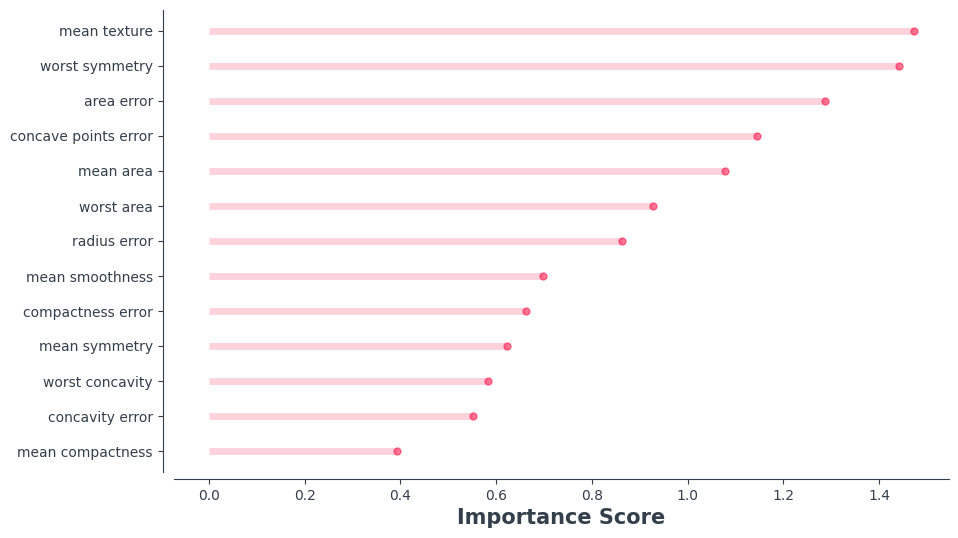

In [2]:
#Default settings
from unravel.tabular import UnRAVELTabularExplainer

#Sample to be explained
sample_idx = sample_idx[0]

#Generating initial starting point
X_init = np.array([X_test[sample_idx]])

#Initializing the explainer object
f_e = UnRAVELTabularExplainer(model, X_train, categorical_features = categorical_features, mode = mode)

explanation = f_e.explain(X_init = X_init, feature_names = features, alpha = "FUR", max_iter = 5, \
                          normalize=False, importance_method="ARD")

<StemContainer object of 3 artists>

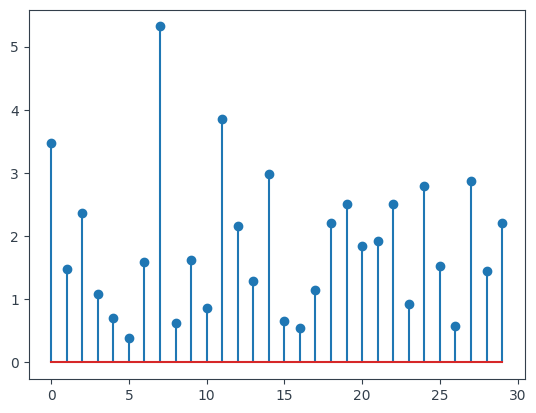

In [3]:
import matplotlib.pyplot as plt
plt.stem(explanation)

In [4]:
print(explanation)

[3.48037423 1.47221584 2.36249242 1.07805988 0.69692964 0.3927715
 1.59450257 5.31969109 0.62243806 1.62162849 0.86202389 3.85228519
 2.15339068 1.28632643 2.98993537 0.66144544 0.5515384  1.14549301
 2.20706386 2.51679826 1.84053502 1.92398349 2.50650398 0.92856421
 2.797423   1.525588   0.58220027 2.87453491 1.44103978 2.20522367]


In [5]:
print(features)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
# Generate explantion data for Random Foreall_featuresst
from project_utils.feature_stats import Feature_Statistics

UR_Stats = Feature_Statistics(feature_names = features, mode='classification', classes=['malignant', 'benign'])

for test_instance in range(10):##X_test.shape[0]):

    X_init = np.array([X_test[test_instance]])

    UR_explain_inst = f_e.explain(X_init = X_init, feature_names = features, alpha = "FUR", max_iter = 5, \
                          normalize=False, plot=False, importance_method="ARD")
     
    y_predict = model.predict_proba(X_init)

    print('INSTANCE: ', test_instance)
    
    UR_Stats.Add_Sample(sample     = UR_explain_inst,
                        outcome    = y_test[test_instance],
                        prediction = y_predict)
    
    last_instance = test_instance

INSTANCE:  0
INSTANCE:  1
INSTANCE:  2
INSTANCE:  3
INSTANCE:  4
INSTANCE:  5
INSTANCE:  6
INSTANCE:  7
INSTANCE:  8
INSTANCE:  9
INSTANCE:  10
INSTANCE:  11
INSTANCE:  12
INSTANCE:  13
INSTANCE:  14
INSTANCE:  15
INSTANCE:  16
INSTANCE:  17
INSTANCE:  18
INSTANCE:  19
INSTANCE:  20
INSTANCE:  21
INSTANCE:  22
INSTANCE:  23
INSTANCE:  24
INSTANCE:  25
INSTANCE:  26
INSTANCE:  27
INSTANCE:  28
INSTANCE:  29
INSTANCE:  30
INSTANCE:  31
INSTANCE:  32
INSTANCE:  33
INSTANCE:  34
INSTANCE:  35
INSTANCE:  36
INSTANCE:  37
INSTANCE:  38
INSTANCE:  39
INSTANCE:  40
INSTANCE:  41
INSTANCE:  42
INSTANCE:  43
INSTANCE:  44
INSTANCE:  45
INSTANCE:  46
INSTANCE:  47
INSTANCE:  48
INSTANCE:  49
INSTANCE:  50
INSTANCE:  51
INSTANCE:  52
INSTANCE:  53
INSTANCE:  54
INSTANCE:  55
INSTANCE:  56


In [8]:
UR_Stats.Feature_Counts(max_features=8, scaled=True, threshold=0.075)

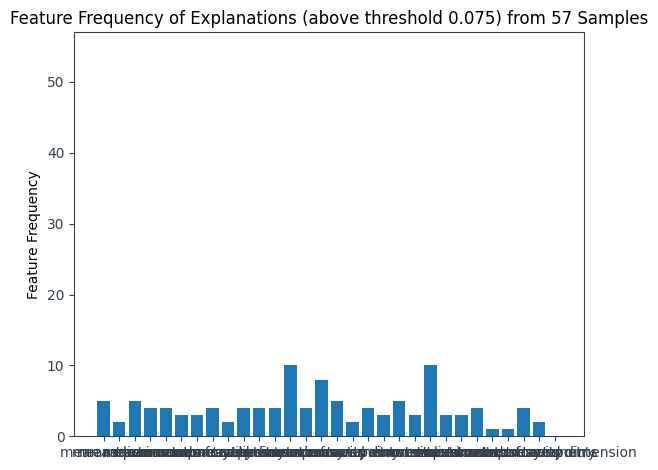

In [9]:
UR_Stats.Frequency_Plot(top_features=False)

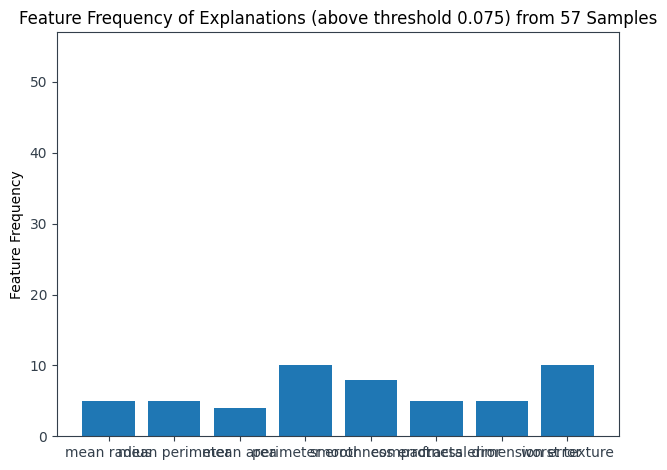

In [10]:
UR_Stats.Frequency_Plot()

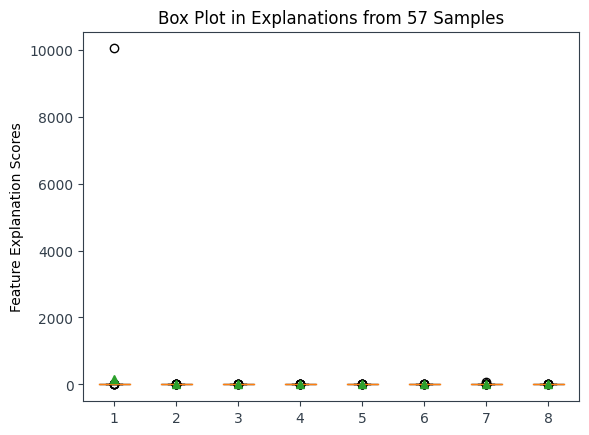

1 -      mean radius
2 -      mean perimeter
3 -      mean area
4 -      perimeter error
5 -      smoothness error
6 -      compactness error
7 -      fractal dimension error
8 -      worst texture


In [11]:
UR_Stats.Box_Plot()

AttributeError: 'numpy.ndarray' object has no attribute 'remove'

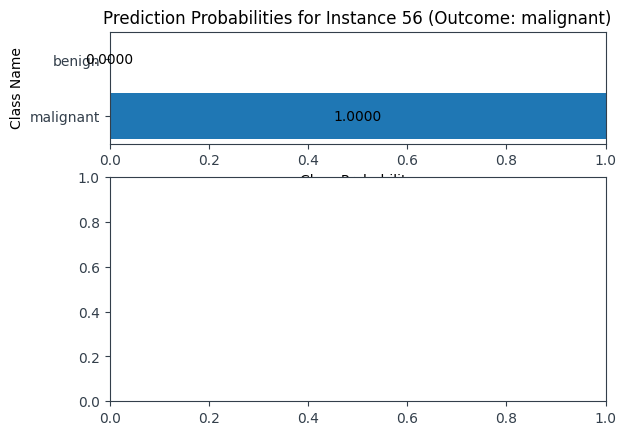

In [12]:
UR_Stats.View_Explanation(instance=last_instance, max_features=6)